<a href="https://colab.research.google.com/github/Reinaldos/Reinaldos/blob/main/Aula_3_Exploracao_dos_dados_com_visualizacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=green> Exploração de Dados com análise estatística

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados.csv to dados (1).csv


In [ ]:
import io
dados = pd.read_csv(io.StringIO(uploaded['dados.csv'].decode('utf-8')))
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

- O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

### Distribuição de frequências para variáveis qualitativas

- O método value_counts devolve uma Series contendo valores únicos como seu índice e as frequências como seus valores; a ordem dos contadores é decrescente

In [ ]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

- Atribuindo o parametro True para normalize e multiplicando por 100, você tem o percentual de frequencia para cada categoria

In [ ]:
dados['Sexo'].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


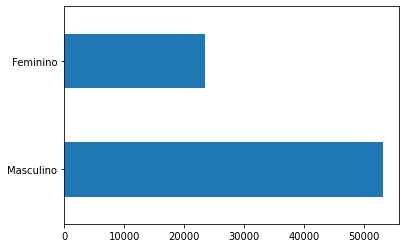

In [ ]:
dist_freq_qualitativas['Frequência'].plot.barh(rot=0)

In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

- A função crosstab permite cruzar os dados afim de calcular a frequência entre categorias . Para o nosso exemplo, ele permite contabilizar a quantidade de pessoas por genero de cada etnia

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


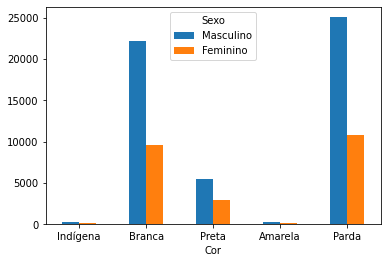

In [ ]:
frequencia.T.plot.bar(rot=0)

- Calculando o percentual de pessoas por gênero de cada etnia

In [ ]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


- Calculando a renda média do genero de cada etnia

In [ ]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


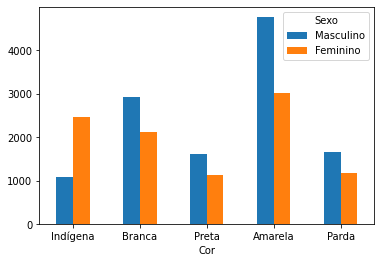

In [ ]:
percentual.T.plot.bar(rot=0)

### Distribuição de frequências para variáveis quantitativas

Passo 1 - Especificar os limites de cada classe
Utilizar a seguinte classificação:

A ► Acima de 20 SM

B ► De 10 a 20 SM

C ► De 4 a 10 SM

D ► De 2 a 4 SM

E ► Até 2 SM

onde SM é o valor do salário mínimo na época. Em nosso caso R$ 788,00 (2015):

A ► Acima de 15.760

B ► De 7.880 a 15.760

C ► De 3.152 a 7.880

D ► De 1.576 a 3.152

E ► Até 1.576

In [ ]:
min(dados["Renda"])

0

In [ ]:
max(dados["Renda"])

200000

Passo 2 - Criar a tabela de frequências

- Definindo classes de rendas

In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

- Contabilizando a quantidade de pessoas de cada classe de renda

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

- Contabilizando a porcentagem de pessoas de cada classe de renda

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)*100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


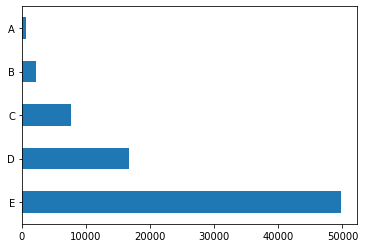

In [ ]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.barh(rot=0)

- O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

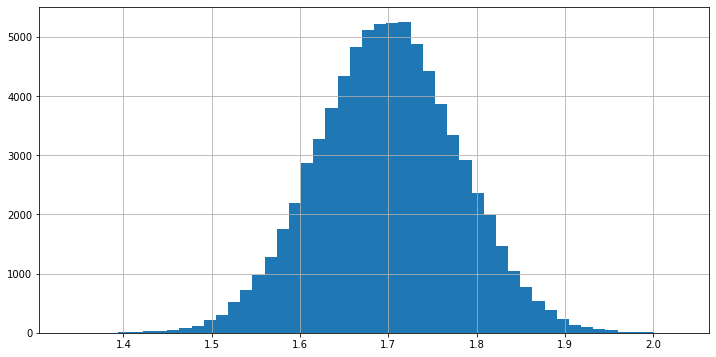

In [ ]:
dados.Altura.hist(bins = 50, figsize=(12,6))

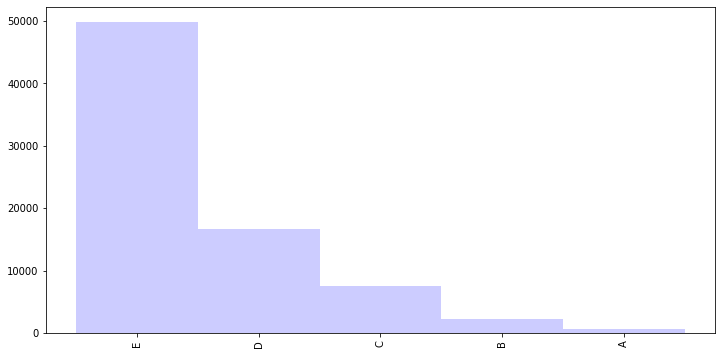

In [ ]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))

***
O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://miro.medium.com/max/1400/0*bsjTki4h_uNvkO2A.png' width='65%'>

In [ ]:
df = dados.copy()
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

In [ ]:
df['Genero'] = df['Sexo'].apply(lambda x: sexo[x])
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Genero
0,11,0,23,8,12,800,1.603808,Masculino
1,11,1,23,2,12,1150,1.739790,Feminino
2,11,1,35,8,15,880,1.760444,Feminino
3,11,0,46,2,6,3500,1.783158,Masculino
4,11,1,47,8,9,150,1.690631,Feminino
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,Feminino
76836,53,0,30,4,7,1500,1.792934,Masculino
76837,53,0,32,8,12,1300,1.830587,Masculino
76838,53,0,57,8,4,1500,1.726344,Masculino


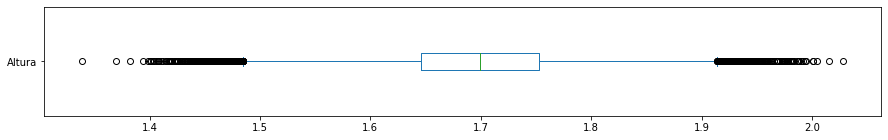

In [ ]:
df['Altura'].plot.box(vert=False, figsize=(15,2))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


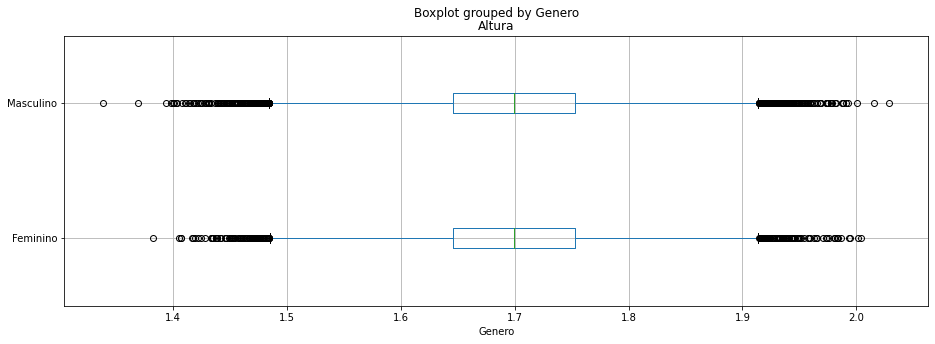

In [ ]:
boxplot = df.boxplot(vert=False, column='Altura', by='Genero', figsize=(15,5))

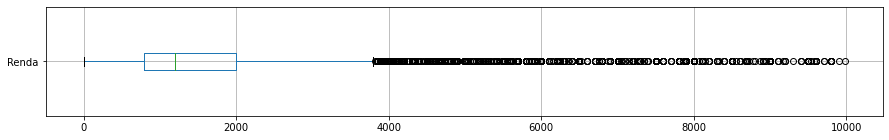

In [ ]:
df.query('Renda < 10000').boxplot(vert=False, column='Renda', figsize=(15,2))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


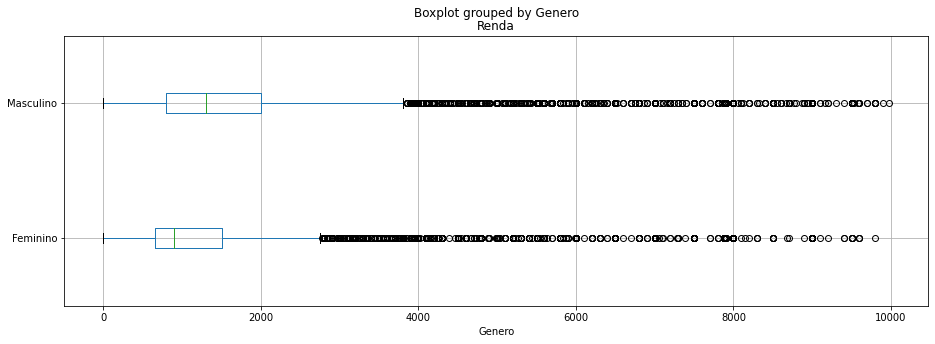

In [ ]:
df.query('Renda < 10000').boxplot(vert=False, column='Renda', by='Genero', figsize=(15,5))

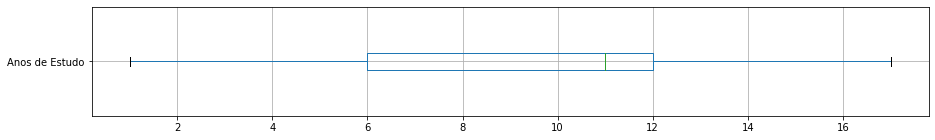

In [ ]:
df.boxplot(vert=False, column='Anos de Estudo', figsize=(15,2))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


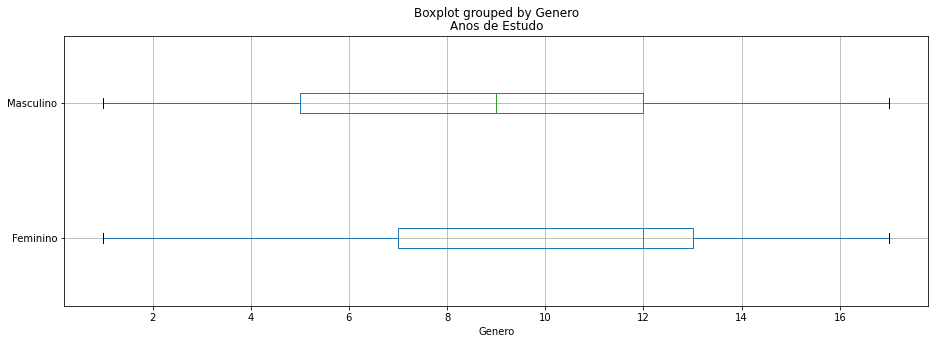

In [ ]:
df.boxplot(vert=False, column='Anos de Estudo', by='Genero', figsize=(15,5))

### Medidas de dispersão
- Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

In [ ]:
df = pd.DataFrame(data = {'Fulano': [8.0, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])

df.index.name = 'Matérias'
df.columns.name = 'Alunos'

df

Alunos,Fulano,Beltrano,Sicrano
Matérias,,,
Matemática,8.0,10.0,7.5
Português,10.0,2.0,8.0
Inglês,4.0,0.5,7.0
Geografia,8.0,1.0,8.0
História,6.0,3.0,8.0
Física,10.0,9.5,8.5
Química,8.0,10.0,7.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a8daac710>,
      dtype=object)

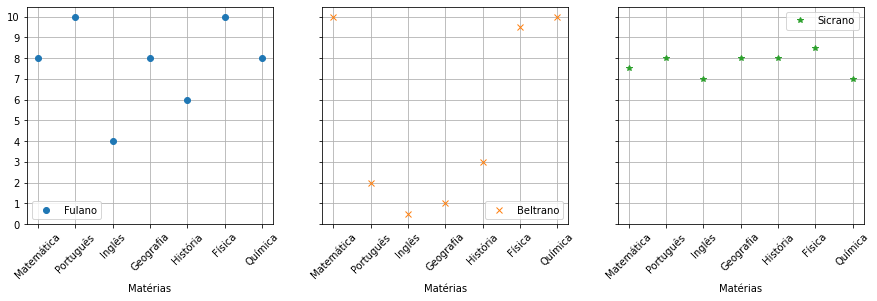

In [ ]:
df.plot(style=['o','x','*'], rot=45, 
        subplots=True, figsize=(15,4), 
        sharey=True, layout=(1, 3), 
        yticks=range(0,11), grid=True)

In [ ]:
df.mean()

Alunos
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [ ]:
notas_fulano = df[['Fulano']]
notas_fulano

Alunos,Fulano
Matérias,
Matemática,8.0
Português,10.0
Inglês,4.0
Geografia,8.0
História,6.0
Física,10.0
Química,8.0


- Calculando a nota média do Fulano

In [ ]:
nota_media_fulano = df['Fulano'].mean()
nota_media_fulano

7.714285714285714

- Calculando o Desvio (diferença entre as notas de Fulano e sua nota média)

In [ ]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Alunos,Fulano,Desvio
Matérias,,
Matemática,8.0,0.285714
Português,10.0,2.285714
Inglês,4.0,-3.714286
Geografia,8.0,0.285714
História,6.0,-1.714286
Física,10.0,2.285714
Química,8.0,0.285714


- Calculando o módulo (remoção do sinal)

In [ ]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Alunos,Fulano,Desvio,|Desvio|
Matérias,,,
Matemática,8.0,0.285714,0.285714
Português,10.0,2.285714,2.285714
Inglês,4.0,-3.714286,3.714286
Geografia,8.0,0.285714,0.285714
História,6.0,-1.714286,1.714286
Física,10.0,2.285714,2.285714
Química,8.0,0.285714,0.285714


In [ ]:
notas_fulano.index

Index(['Matemática', 'Português', 'Inglês', 'Geografia', 'História', 'Física',
       'Química'],
      dtype='object', name='Matérias')

In [ ]:
notas_fulano['Média'] = nota_media_fulano

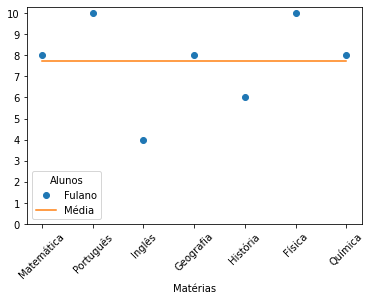

In [ ]:
notas_fulano[['Fulano', 'Média']].plot(style=['o','-'], rot=45, yticks=range(0,11))

- Calculando o Desvio Padrão através na média dos valores do módulo do Desvio

In [ ]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

- Calculando o Desvio Padrão (absoluto) através da função mad

In [ ]:
notas_fulano['Fulano'].mad()

1.5510204081632648

## <font color=green> Recapitulando correlação e covariância

Algumas estatísticas de resumo, como **correlação** e **covariância**, são calculadas a partir de pares de argumentos.    
> - correlação: resume o grau de relacionamento entre duas variáveis (X e Y, por exemplo).
> ***

|Correlação|Negativa|Positiva|
|---|---|---|
|Baixa|de -0,5 à 0|de 0 à 0,5|
|Alta|de -1 à -0,5|de 0,5 à 1|

> - covariância: é uma medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis.
> ***



- Vamos carregar um dataset com o preço de ações de algumas *Big Techs*

In [ ]:
uploaded = files.upload()

Saving price_stocks.csv to price_stocks (1).csv


In [ ]:
price = pd.read_csv(io.StringIO(uploaded['price_stocks.csv'].decode('utf-8')),index_col='Date')
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2010-01-04,6.57,91.51,23.99,312.20
2010-01-05,6.58,90.40,24.00,310.83
2010-01-06,6.48,89.81,23.86,302.99
2010-01-07,6.47,89.50,23.61,295.94
2010-01-08,6.51,90.40,23.77,299.89


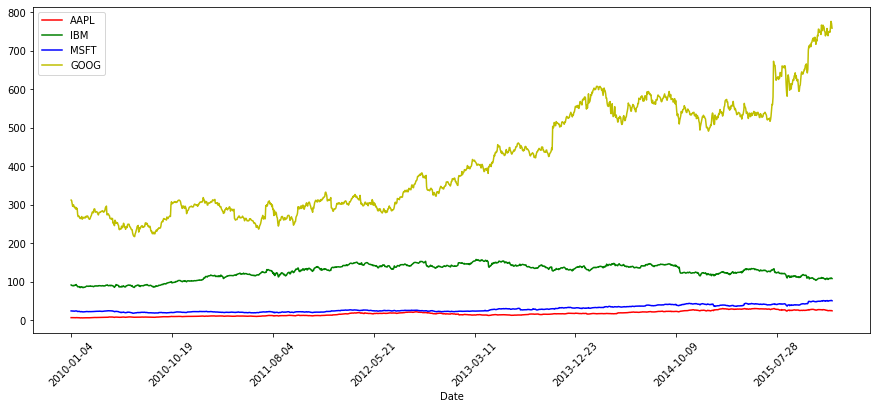

In [ ]:
price.plot(style=['r-','g-','b-','y-'], rot=45, figsize=(15,6))

In [ ]:
uploaded = files.upload()

Saving volume_stocks.csv to volume_stocks (2).csv


In [ ]:
volume = pd.read_csv(io.StringIO(uploaded['volume_stocks.csv'].decode('utf-8')),index_col='Date')
volume.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2010-01-04,493729600,6155300,38409100,3927065
2010-01-05,601904800,6841400,49749600,6031925
2010-01-06,552160000,5605300,58182400,7987226
2010-01-07,477131200,5840600,50559700,12876685
2010-01-08,447610800,4197200,51197400,9484016


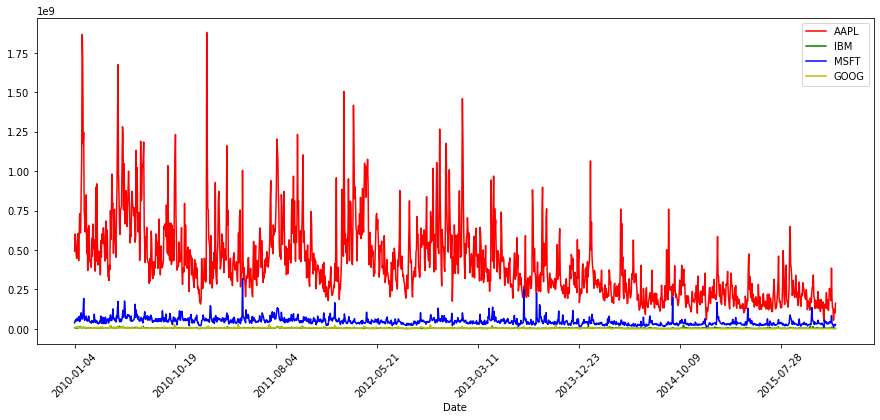

In [ ]:
volume.plot(style=['r-','g-','b-','y-'], rot=45, figsize=(15,6))

- Vamos agora calcular as mudanças percentuais nos preços.

In [ ]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-12-24,-0.005582,-0.002115,-0.002564,-0.002546
2015-12-28,-0.011227,-0.004607,0.004944,0.018854
2015-12-29,0.018248,0.015736,0.010823,0.018478
2015-12-30,-0.013142,-0.003099,-0.004283,-0.007211
2015-12-31,-0.019370,-0.012341,-0.014858,-0.015720


- O método corr de Series calcula a correlação entre os valores diferentes de NA de duas Series, alinhados pelo índice e que se sobrepõem.

In [ ]:
returns['MSFT'].corr(returns['IBM'])

0.5080444874087223

- De forma relaciona, cov calcula a covariância

In [ ]:
returns['MSFT'].cov(returns['IBM'])

8.901383608936152e-05

- Os métodos corr e cov de DataFrame, por outro lado, devolvem uma matriz completa de correlação ou de covariância como um DataFrame, respectivamente.

In [ ]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.397686,0.379402,0.405395
IBM,0.397686,1.000000,0.508044,0.413306
MSFT,0.379402,0.508044,1.000000,0.444555
GOOG,0.405395,0.413306,0.444555,1.000000


In [ ]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000282,0.000080,0.000093,0.000110
IBM,0.000080,0.000143,0.000089,0.000080
MSFT,0.000093,0.000089,0.000214,0.000105
GOOG,0.000110,0.000080,0.000105,0.000263


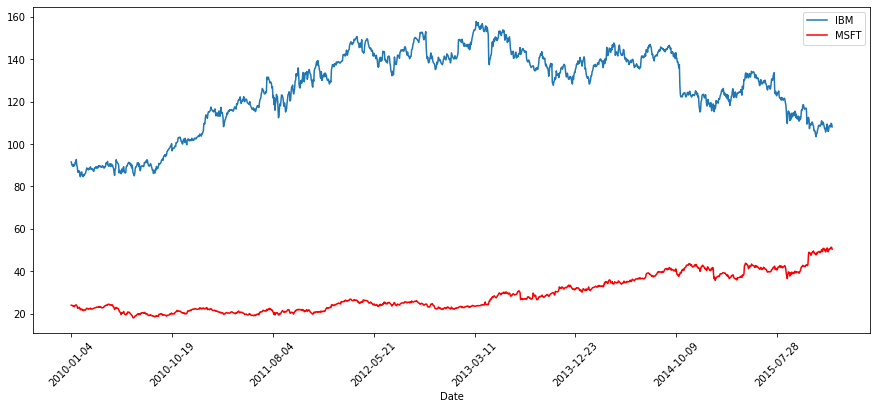

In [ ]:
price[['IBM', 'MSFT']].plot(style=['-','r-'], rot=45, figsize=(15,6))

- Ao usar o método corrwith de DataFrame, podemos calcular correlações de pares entre as colunas ou linhas de um DataFrame com outra Series ou um DataFrame. Passar uma Series devolve uma Series com o valor das correlações calculado para outra coluna.

In [ ]:
returns.corrwith(returns['IBM'])

AAPL    0.397686
IBM     1.000000
MSFT    0.508044
GOOG    0.413306
dtype: float64

- Passar um DataFrame calcula as correlações entre os nomes de coluna correspondentes. Nesse caso, está calculado as correlações entre as mudanças percentuais e o volume

In [ ]:
returns.corrwith(volume)

AAPL   -0.082692
IBM    -0.202109
MSFT   -0.083289
GOOG   -0.000192
dtype: float64